In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from pathlib import Path

import h5py

import scipy
from scipy import signal
import scipy.io
from scipy.signal import freqz
from scipy.signal import butter, lfilter

import tensorflow as tf
from tensorflow.keras.layers import Convolution1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential

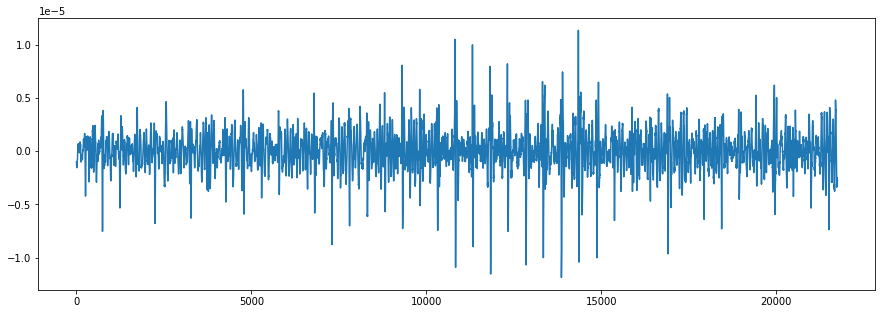

In [2]:
mat = scipy.io.loadmat(r'C:\Users\bansa\Documents\Python\csio_rw\Data\Seismic Data\Walk\DevendraWalk3LRGS20DX10Hz1event.mat')
# print(mat.keys())
a = mat['Data1_SNG20DX10Hz1']
a = (a - np.mean(a))/20
plt.figure(figsize=(15,5))
plt.plot(a)

In [3]:
l = []
th1 = 0.0000075
th2 = -0.0000075
for i in range(len(a)):
    if a[i]>th1 or a[i]<th2:
        l.append(i)
# print(l) 

In [4]:
lf = []
lf.append(l[0])
for i in range(len(l)-1):
    if l[i]+150 < l[i+1]:
        lf.append(l[i+1])
# lf

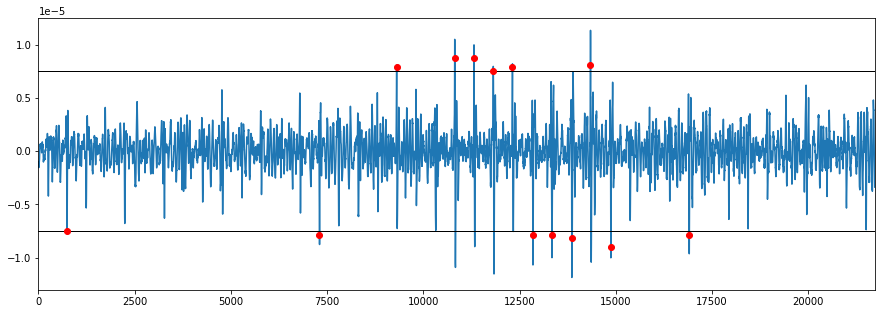

In [5]:
plt.figure(figsize=(15,5))
plt.plot(a)
plt.margins(x=0)

plt.axhline(y=th1, linewidth=1, color='k')
plt.axhline(y=th2, linewidth=1, color='k')

# plt.plot(l,a[l],'ko')
plt.plot(lf,a[lf],'ro')

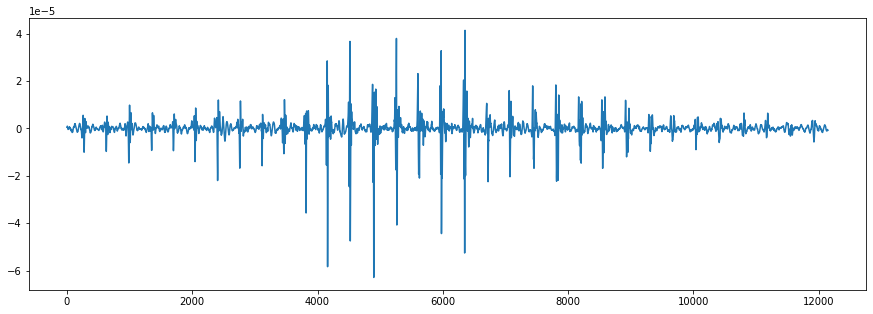

In [6]:
mat = scipy.io.loadmat(r'C:\Users\bansa\Documents\Python\csio_rw\Data\Seismic Data\Run\DevendraRun2LRGS20DX10Hz1event.mat')
# print(mat.keys())
a = mat['Data1_SNG20DX10Hz1']
a = (a - np.mean(a))/20
plt.figure(figsize=(15,5))
plt.plot(a)

In [7]:
l = []
th1 = 0.00002
th2 = -0.00002
for i in range(len(a)):
    if a[i]>th1 or a[i]<th2:
        l.append(i)
# print(l)

In [8]:
lf = []
lf.append(l[0])
for i in range(len(l)-1):
    if l[i]+150 < l[i+1]:
        lf.append(l[i+1])
# lf

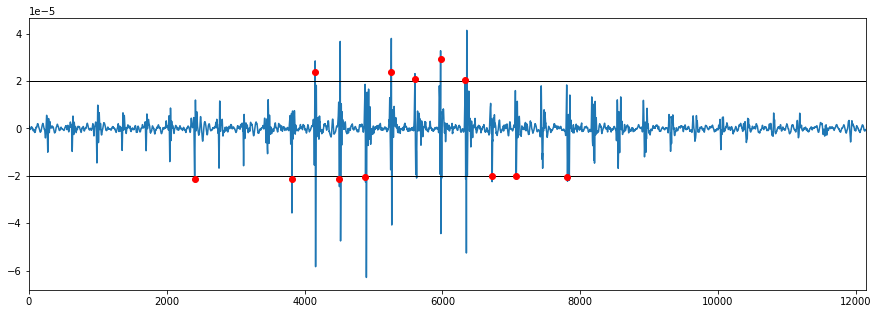

In [9]:
plt.figure(figsize=(15,5))
plt.plot(a)
plt.margins(x=0)

plt.axhline(y=th1, linewidth=1, color='k')
plt.axhline(y=th2, linewidth=1, color='k')

# plt.plot(l,a[l],'ko')
plt.plot(lf,a[lf],'ro')

21745
[0.0000e+00 1.0000e-03 2.0000e-03 ... 2.1742e+01 2.1743e+01 2.1744e+01]
21745


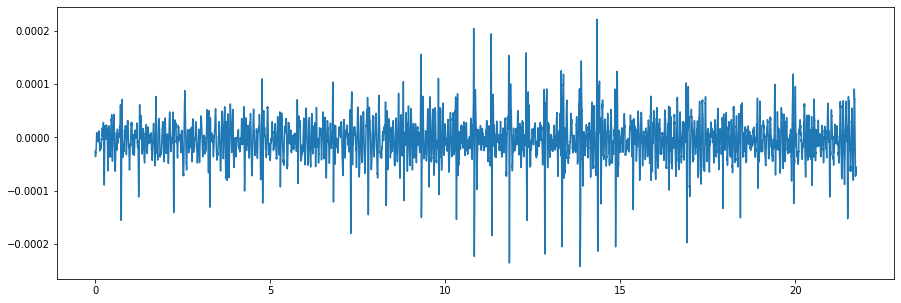

In [10]:
mat = scipy.io.loadmat(r'C:\Users\bansa\Documents\Python\csio_rw\Data\Seismic Data\Walk\DevendraWalk3LRGS20DX10Hz1event.mat')
# print(mat.keys())
fs = 1000
a = mat['Data1_SNG20DX10Hz1']
t = len(a)
print(t)
t = np.arange(0,t/fs,1/fs)
# plt.plot(t,a)
print(t)
print(len(a))
plt.figure(figsize=(15,5))
plt.plot(t,a)

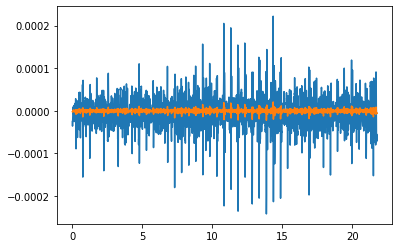

In [11]:
def butter_bandpass(lowcut, highcut, fs, order=50):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=50):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

fs = 1000.0
lowcut = 1.0
highcut = 250.0

mat = scipy.io.loadmat(r'C:\Users\bansa\Documents\Python\csio_rw\Data\Seismic Data\Walk\DevendraWalk3LRGS20DX10Hz1event.mat')
# print(mat.keys())
s = mat['Data1_SNG20DX10Hz1']
t = len(s)
t = np.arange(0,t/fs,1/fs)
plt.plot(t,s)

y = butter_bandpass_filter(s, lowcut, highcut, fs, order=4)
plt.plot(t,y,label='Filtered signal')
# plt.xlabel('time(s)')
# plt.axis('tight')

plt.show()

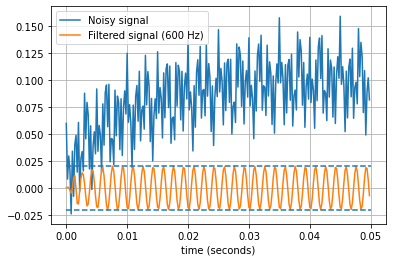

In [12]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 5000.0
lowcut = 500.0
highcut = 1250.0

T = 0.05
nsamples = T * fs
t = np.arange(0, nsamples) / fs
a = 0.02
f0 = 600.0
x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
x += a * np.cos(2 * np.pi * f0 * t + .11)
x += 0.03 * np.cos(2 * np.pi * 2000 * t)
plt.figure(2)
plt.clf()
plt.plot(t, x, label='Noisy signal')

y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
plt.xlabel('time (seconds)')
plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

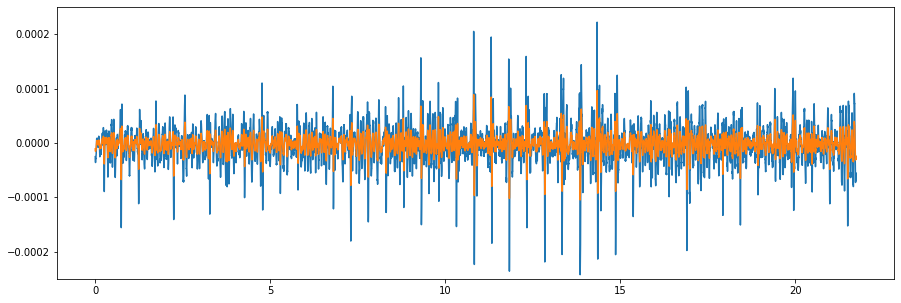

In [13]:
mat = scipy.io.loadmat(r'C:\Users\bansa\Documents\Python\csio_rw\Data\Seismic Data\Walk\DevendraWalk3LRGS20DX10Hz1event.mat')
# print(mat.keys())
fs = 1000
s = mat['Data1_SNG20DX10Hz1']
t = len(s)
t = np.arange(0,t/fs,1/fs)
plt.figure(figsize=(15,5))
plt.ylim(-0.00025,0.00025)
plt.plot(t,s)

b, a = scipy.signal.butter(4, [.1, .9], 'band')
filteredBandPass = scipy.signal.lfilter(b, a, s)

plt.plot(t,filteredBandPass)

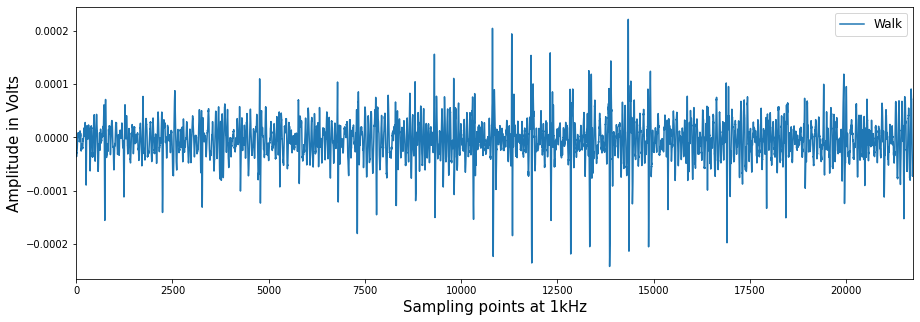

In [14]:
mat = scipy.io.loadmat(r'C:\Users\bansa\Documents\Python\csio_rw\Data\Seismic Data\Walk\DevendraWalk3LRGS20DX10Hz1event.mat')
# print(mat.keys())
a = mat['Data1_SNG20DX10Hz1']
# a = (a - np.mean(a))/20
# t = len(s)
# t = np.arange(0,t/fs,1/fs)
plt.figure(figsize=(15,5))
plt.margins(x=0)
plt.xlabel('Sampling points at 1kHz',fontsize=15)
plt.ylabel('Amplitude in Volts',fontsize=15)
plt.plot(a,label='Walk')
plt.legend(fontsize=12)

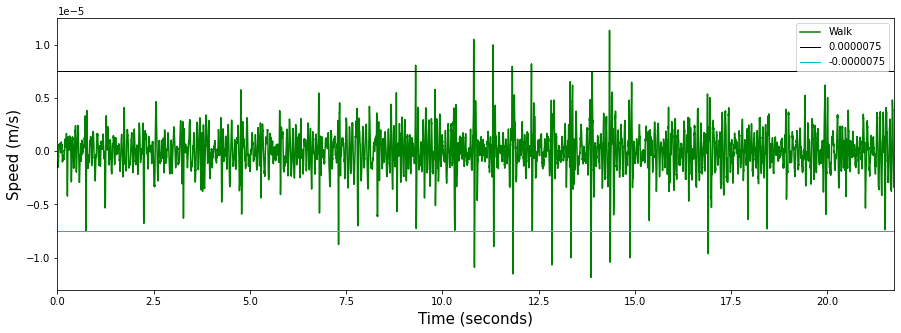

In [15]:
mat = scipy.io.loadmat(r'C:\Users\bansa\Documents\Python\csio_rw\Data\Seismic Data\Walk\DevendraWalk3LRGS20DX10Hz1event.mat')
# print(mat.keys())
a = mat['Data1_SNG20DX10Hz1']
a = (a - np.mean(a))/20
fs = 1000
t = len(a)
t = np.arange(0,t/fs,1/fs)
# print(len(t))
l = []
th1 = 0.0000075
th2 = -0.0000075
for i in range(len(a)):
    if a[i]>th1 or a[i]<th2:
        l.append(i)
# print(l)
plt.figure(figsize=(15,5))
plt.margins(x=0)
plt.xlabel('Time (seconds)',fontsize=15)
plt.ylabel('Speed (m/s)',fontsize=15)
plt.plot(t,a,label='Walk',color='green')
plt.legend(fontsize=12)
plt.axhline(y=th1, linewidth=1, color='k',label='0.0000075')
plt.axhline(y=th2, linewidth=1, color='c',label='-0.0000075')
plt.legend()
# plt.plot(np.array(l)/1000,a[l],'yo')
lf = []
lf.append(l[0])
for i in range(len(l)-1):
    if l[i]+150 < l[i+1]:
        lf.append(l[i+1])
# print(lf)
# plt.plot(np.array(lf)/1000,a[lf],'bo')


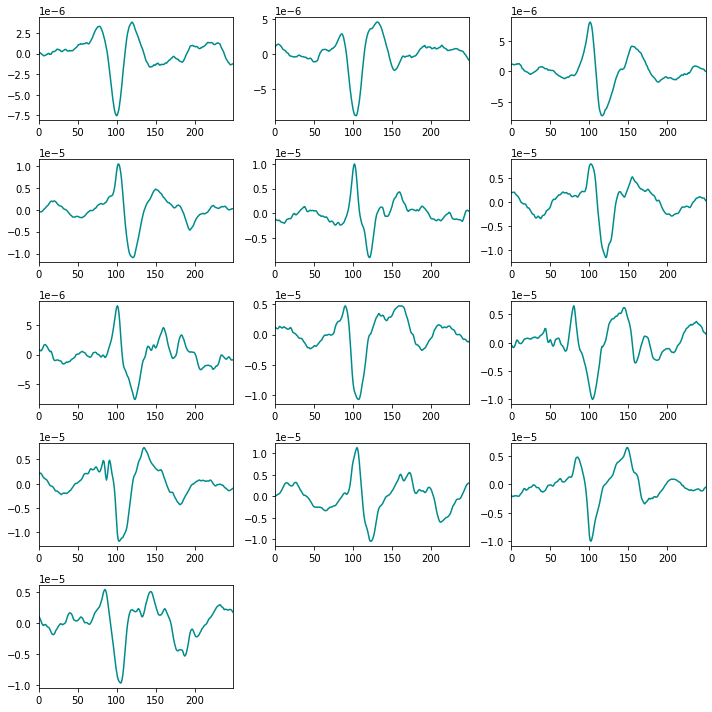

In [16]:
ts = np.empty([0,250])
# print(np.shape(ts))
# print(np.shape(a))
for i in range(len(lf)):
    ts = np.vstack([ts, np.reshape(a[lf[i]-100:lf[i]+150],(1,250))])

fig = plt.figure(figsize=(10,10))
# plt.tight_layout()
for i,t in enumerate(ts):
    # print(i)
    # print(t)
    ax = plt.subplot(5, 3, i + 1)
    ax.plot(t,color='darkcyan')
    plt.margins(x=0)
fig.tight_layout()

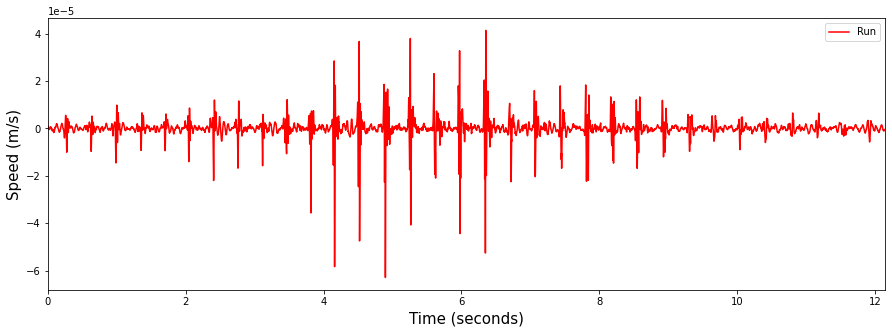

In [18]:
mat = scipy.io.loadmat(r'C:\Users\bansa\Documents\Python\csio_rw\Data\Seismic Data\Run\DevendraRun2LRGS20DX10Hz1event.mat')
# print(mat.keys())
a = mat['Data1_SNG20DX10Hz1']
a = (a - np.mean(a))/20
fs = 1000
t = len(a)
t = np.arange(0,t/fs,1/fs)
# print(len(t))
l = []
th1 = 0.00002
th2 = -0.00002
for i in range(len(a)):
    if a[i]>th1 or a[i]<th2:
        l.append(i)
# print(l)
plt.figure(figsize=(15,5))
plt.margins(x=0)
plt.xlabel('Time (seconds)',fontsize=15)
plt.ylabel('Speed (m/s)',fontsize=15)
plt.plot(t,a,label='Run',color='red')
plt.legend(fontsize=12)
# plt.axhline(y=th1, linewidth=1, color='k',label='0.00002')
# plt.axhline(y=th2, linewidth=1, color='c',label='-0.00002')
plt.legend()